Supervised learning based on linear regression and dataset daily-bike-share.csv

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.dates as mdates
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [3]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [4]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB
None


In [5]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

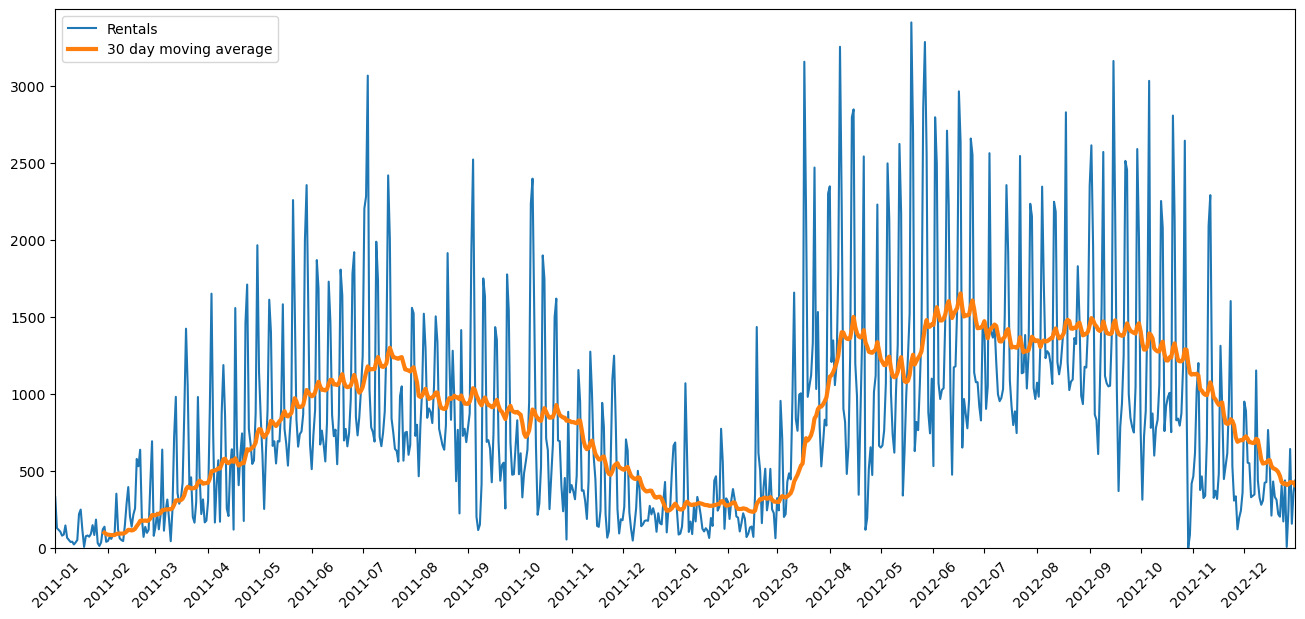

In [7]:
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Rentals')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 day moving average')

plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xticks(rotation=45) 
plt.legend(loc='upper left')
plt.show()

I can see a large variance, there is a significant difference between the highest and lowest value in a short period. I wll check frequency but there is a weekly seasonality. There are more rentals during the holiday season than in the winter.

I will delete non informative columns like instant, dteday and yr.

In [8]:
print('Before delete: ')
display(bike_data_raw)
print('After delete: ')
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

Before delete: 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


After delete: 


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [9]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target = 'rentals'

Month is categorical feautre beacuse we have values from 1 to 12 and for model 12 is quite far away from 1 but in real it is very close. We have also not so many values so better to categorize month into categorical features. 

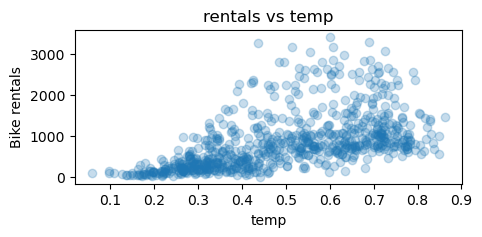

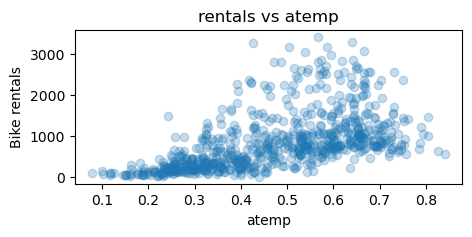

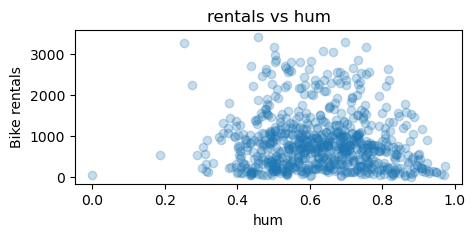

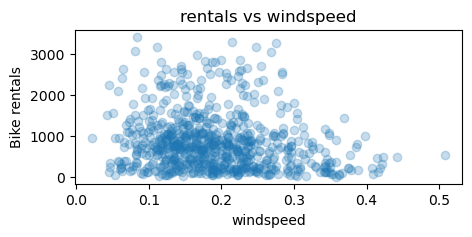

In [11]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5,2))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

Temp and atemp give us same information. It also seems that the number of rented bikes depends on it the most. The warmer it is, the more cyclists there are. The relationship is linear, but from a certain temperature the number of cyclists decreases. For humidity or wind speed the relationship seems to be the opposite. The higher the values, the fewer cyclists.

Relationships can also occur between features, so let's use pairplot for that.

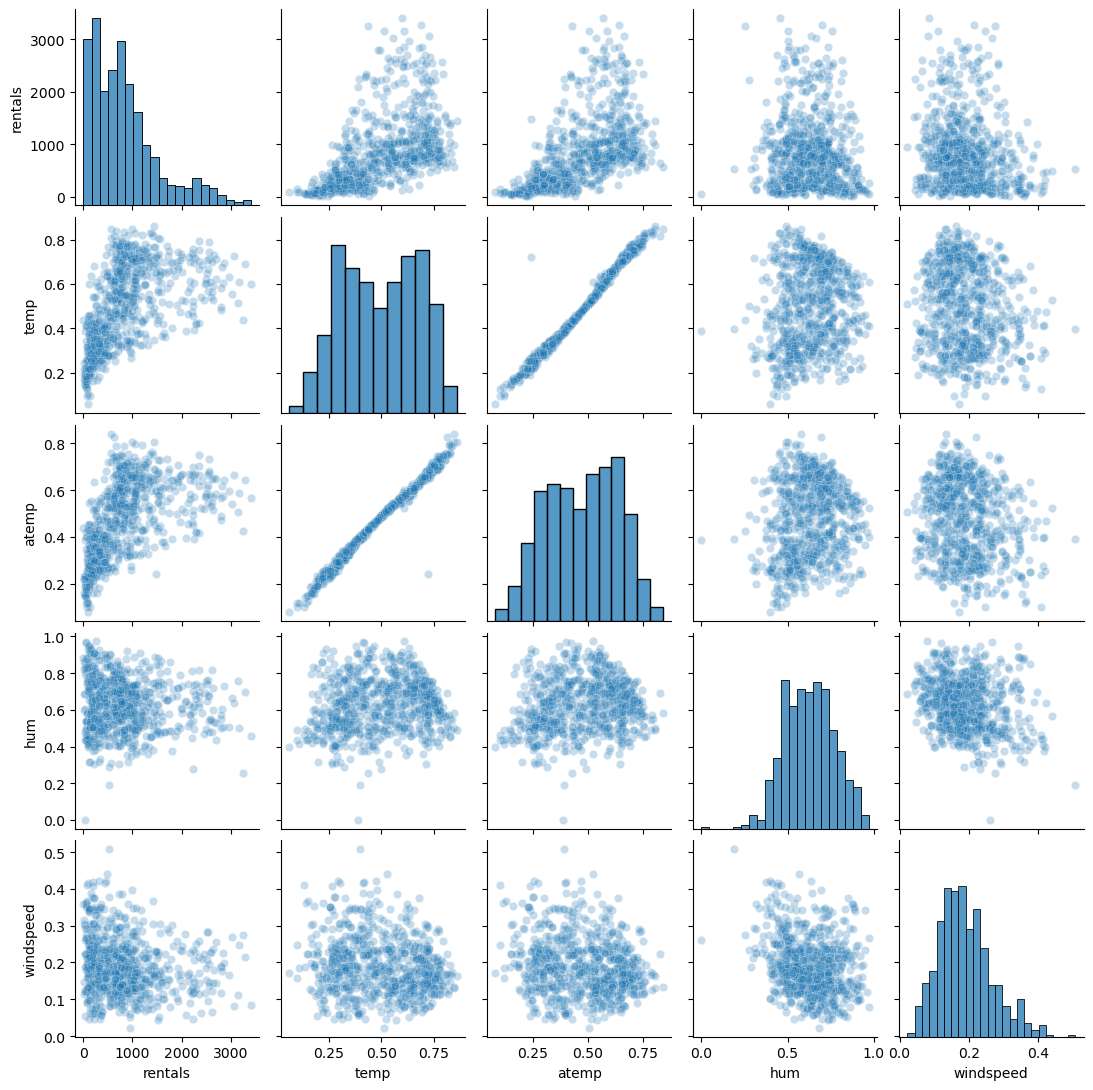

In [12]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha':0.25})
fig.fig.set_size_inches(11, 11)
plt.show()

We also added a rentals variable here, so we could replace the previous scatter plot with this one.

Lets calculate correlation and compare with previous charts.

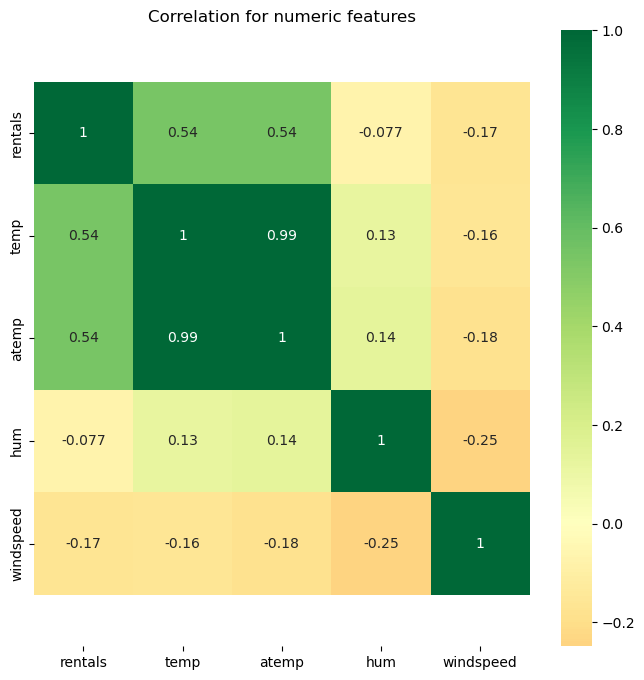

In [13]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),

                 xticklabels = bike_data[[target]+numeric_features].corr().columns,
                 yticklabels = bike_data[[target]+numeric_features].corr().columns,
                 cmap = 'RdYlGn', 
                 center = 0,
                 annot = True)
                
plt.title('Correlation for numeric features', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The same conclusions as we drew earlier. The number of cyclists is most dependent on temperature. Humidity and wind speed have less influence than temperature, and the correlation is also negative. Temperature and perceived temperature carry the same information.ation.

Lets delete one of temperatures. Let's calculate the difference between the perceived temperature and the temperature and scale it.

In [14]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


Lets take a look at categorical features and use violinplot.

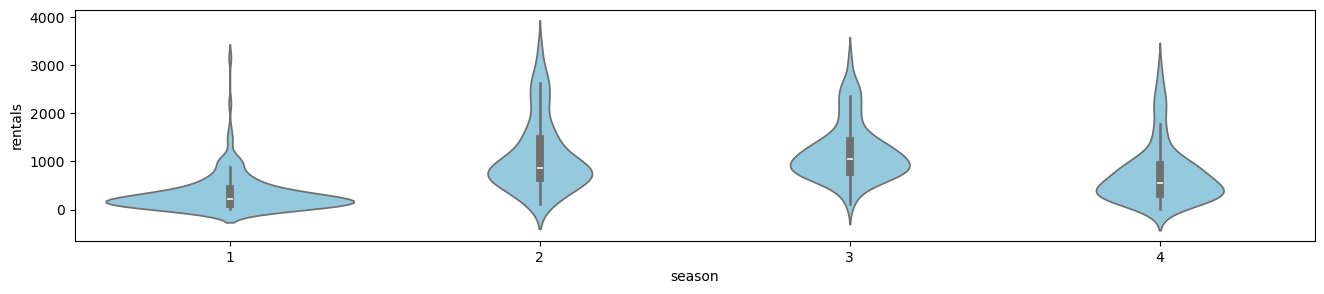

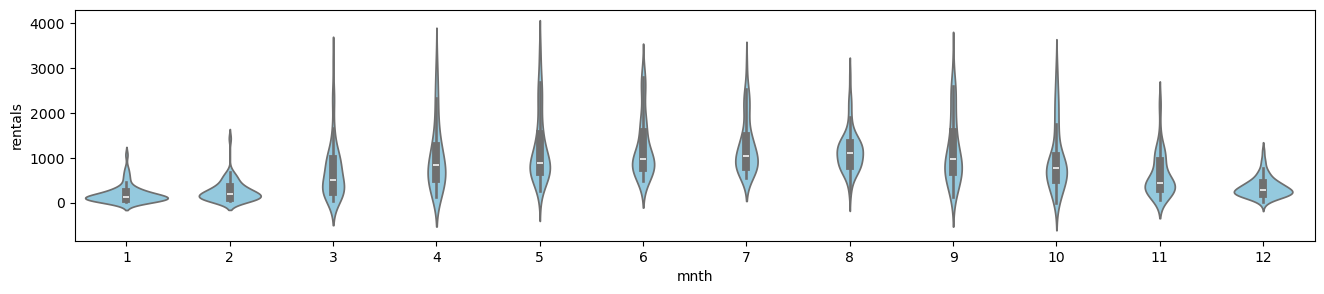

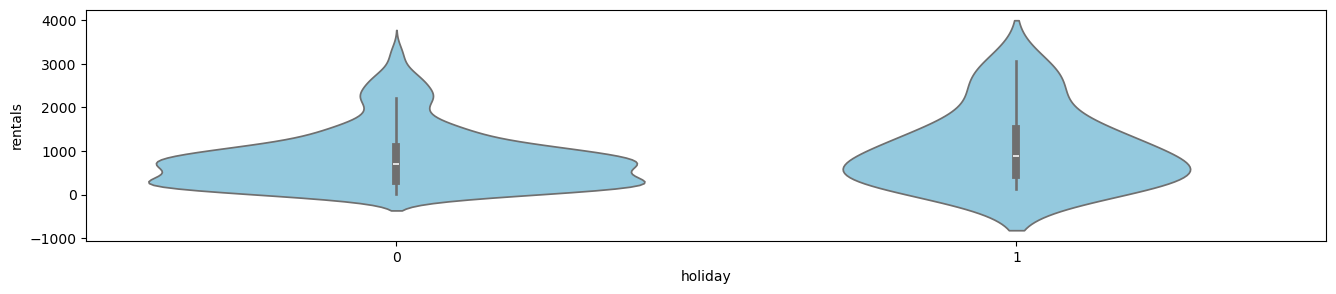

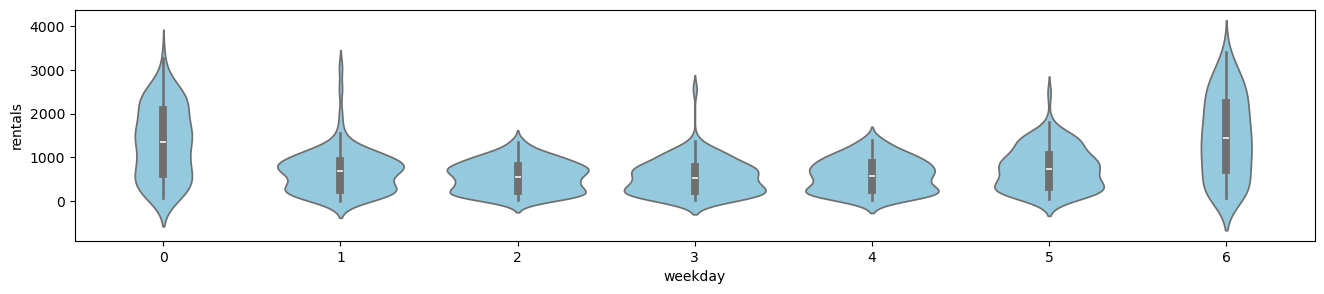

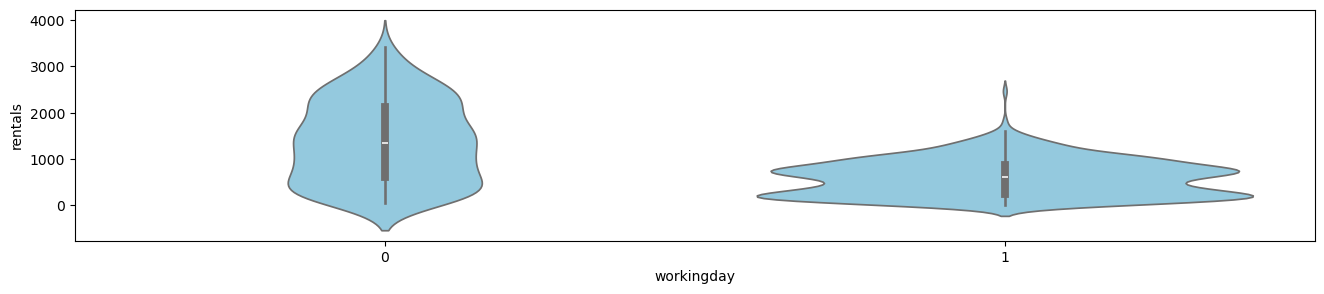

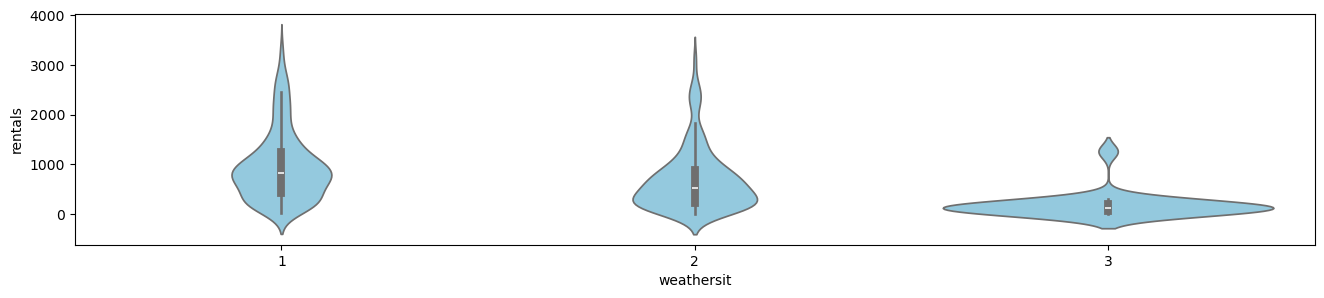

In [19]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], color="skyblue")
    plt.show()

Season - the fewest bikes are rented in winter. The most at the turn of spring and summer. Throughout the winter, the number of rented bikes remains below 500. Spring and summer have numbers ranging from 500 to 3,000. The most rentals are around 1,000. Summer is characterized by greater stability of rentals than spring, but it is not a big difference. Autumn is still a good time to rent a bike, but the density of the largest number of rentals is lower than spring and summer.

Month - The month of December, January and February are the worst months in terms of the number of rented bikes. The situation improves much more in March, where the number increases twice as much as in February. April and May are comparable to September and October. There are a lot of rentals, but these are not stable numbers but very diversified. These are months with unstable weather and this is probably the factor that has the greatest impact. June, July and August are months with a large number of rentals, because the highest density of data falls on numbers around 1000. In my opinion, the most rentals are in April, May and September because there is a large diversity and there is a large density of data on high numbers and the graphs are the longest.

Holiday - there are definitely more rentals on days that are a holiday, because the data density is high at the level of 500 to 2000, and above that there are still a lot of rentals up to 3000. On days that are not a holiday the most rentals are in the range of up to 1500, but there are still significantly fewer of them than on a holiday.

Day of the week - the most rentals are definitely on Sunday and Saturday. On Friday and Monday, taking into account weekdays, there are also a lot of rentals. On other days, in my opinion, rentals are at a similar level. Monday and Wednesday are days when there are "outlier" numbers of rentals reaching even 3,000.

Working day - there are definitely more loans on a day off. These are values ​​reaching 4000. Stability is high and the greatest data density occurs in the range from 500 to 2500. In my opinion, a working day looks at least 2x worse in terms of loans. The most loans are up to 1000 and there are outliers reaching 2500.

Weather situation - there are more rentals on a cloudless day than on a cloudy day, but these values ​​do not differ significantly. On a cloudless day, we have a higher data density with larger numbers such as 2000-3000, in the case of a cloudy day, these numbers are visibly smaller. However, the highest data density in both cases is at similar levels. On a day when it rains or snows, rentals are still there, but at a fairly low level and are 3 or 4 times less than in the other two cases.

In [20]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


Lets make model based on temperature. Our X is temp and Y is rentals.

In [21]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
print('X:')
print(X.values[:3])
print('\ny:')
print(y.values[:3])

X:
[[0.344167]
 [0.363478]
 [0.196364]]

y:
[331 131 120]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f'X.shape: {X.shape}, y.shape {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape {y_test.shape}')

X.shape: (731, 1), y.shape (731,)

X_train.shape: (584, 1), y_train.shape (584,)
X_test.shape: (147, 1), y_test.shape (147,)


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lr_model.intercept_) 
print(lr_model.coef_) 

-179.96286312537347
[1990.31869846]


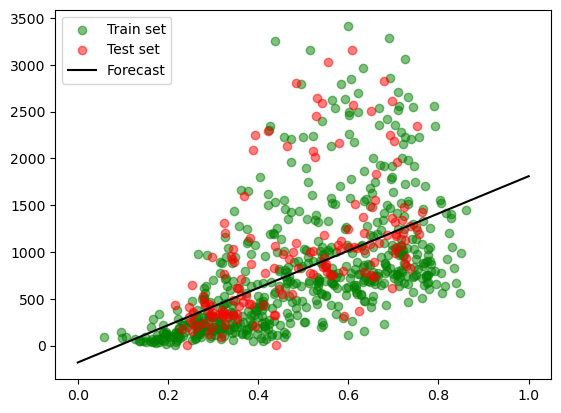

In [25]:
X_linspace = np.linspace(0, 1, 100) 
y_fitted = lr_model.intercept_+lr_model.coef_*X_linspace
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Train set')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test set')
plt.plot(X_linspace, y_fitted, color='black', label='Forecast')
plt.legend(loc='upper left')
plt.show()

Let's see how to make a forecast on new data, because that's always our goal.

In [27]:
X_new = [[0.3],
         [0.7]]
predicted_data = lr_model.predict(X_new)
print(predicted_data)

[ 417.13274641 1213.2602258 ]


C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The number of cyclists is a whole number, so we should round our forecast.

In [28]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

In [29]:
print('Prediction:')
print(np.round(y_predict_test[:5]).astype(int))
print('Real values:')
print(y_test.values[:5])

Prediction:
[1285 1313 1324 1245 1198]
Real values:
[1278 1263 1196 1065 2247]


In [30]:
print(f'Train R^2: {r2_score(y_train, y_predict_train)}')

Train R^2: 0.30617863454631333


The model explains only 30% of the variability in y.

In [31]:
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test)}')

Train MAE: 404.83395997526156
Test MAE: 391.02879410802956


A low 𝑅^2 and relatively high MAE indicate that the model is not doing a perfect job of predicting. If the output variable has a high scale, such MAE values ​​are acceptable, but if the scale is small, such errors are too high and the model needs improvement.

In [32]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_test, y_predict_test)}')

Train MAPE: 0.9668581511778541
Train MAPE: 2.986492531856051


On average our model is wrong by almost 300%. We are better at forecasting than average.

In [33]:
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test)}')

Train MSE: 317745.9412425235
Test MSE: 397066.9447179113


In [34]:
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


RMSE cannot be smaller than MAE, and the difference between them indicates the scale of large errors.

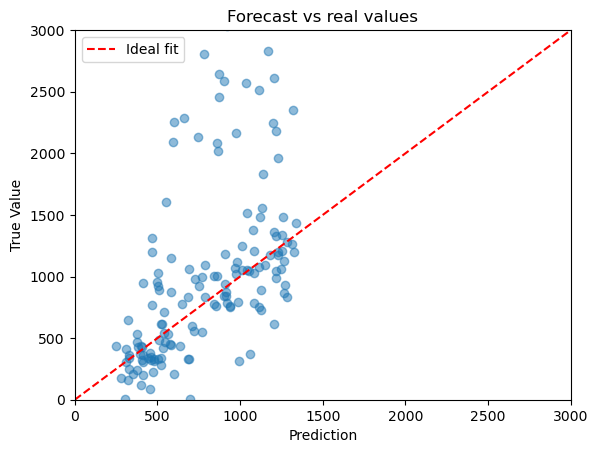

In [37]:
plt.scatter(y_predict_test, y_test, alpha=0.5)
plt.title('Forecast vs real values')
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Prediction')
plt.ylabel('True Value')
x = np.linspace(0, 3000, 100)
plt.plot(x, x, 'r--', label='Ideal fit')

plt.legend()
plt.show()

The model underestimates high values.

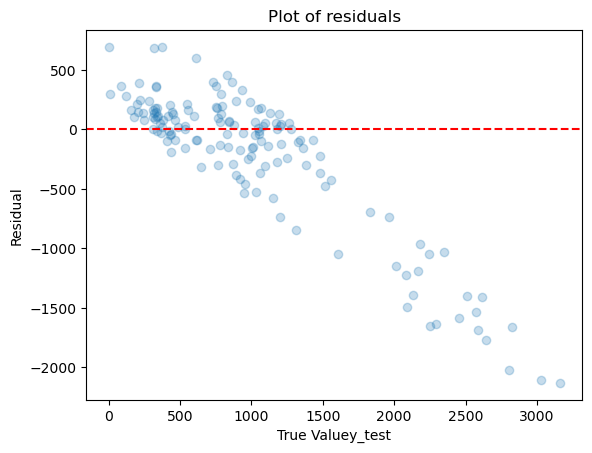

In [38]:
errors = y_predict_test - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

The relationship is very noticeable in the above graph. The higher the true values, the more the model underestimates.

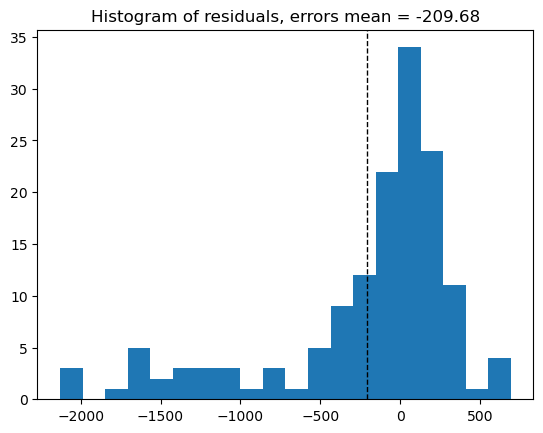

In [39]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

However, the relationship is not always linear. As the temperature increases from 15°C to 25°C, the number of cyclists will increase, but in the case of an increase from 25°C to 35°C, the relationship may be reversed, not to mention even higher temperatures. We use a polynomial of the nth degree, i.e. we create new features that are a power from 1 to the nth degree.

C:\Users\matyj\AppData\Local\Temp\ipykernel_9464\2334552970.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1,1)
C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


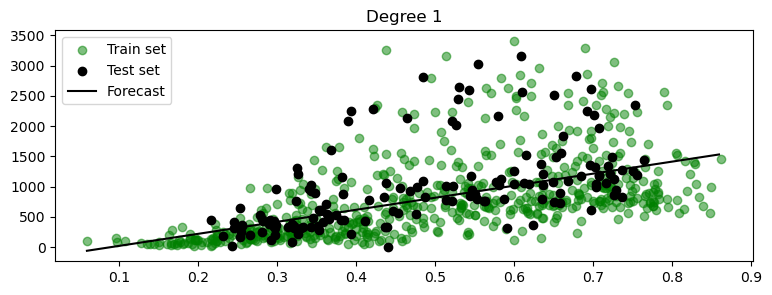

C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


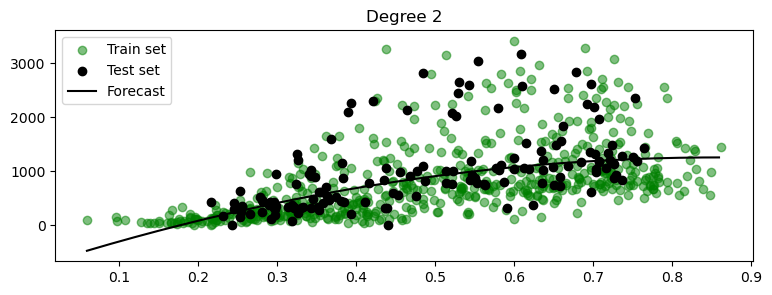

C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


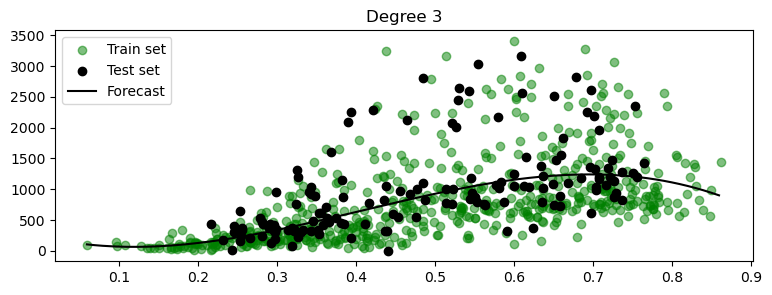

C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


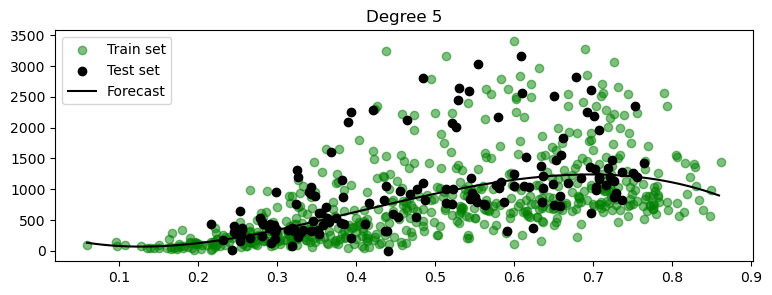

C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


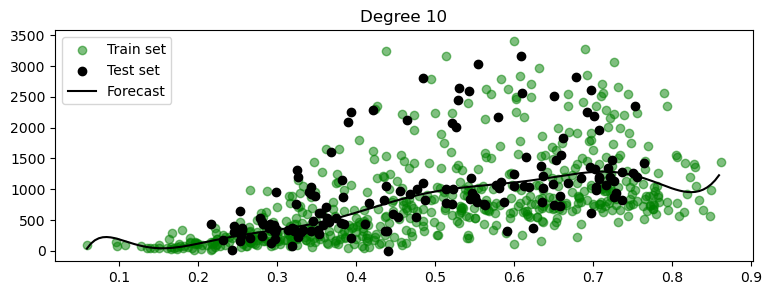

C:\Users\matyj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


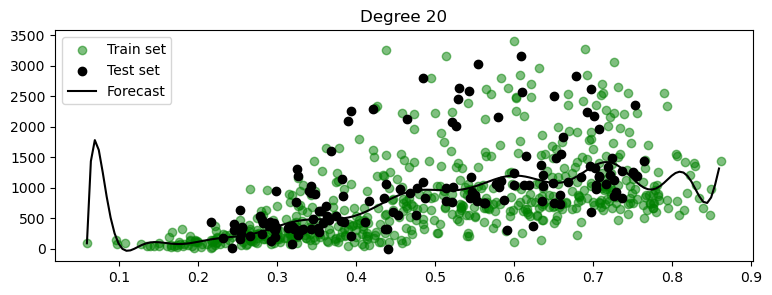

In [42]:
r_2_train_list = []
rmse_train_list = []
rmse_test_list = []
X_linespace = np.arange(X.min()[0], X.max()[0], step=0.005).reshape(-1,1)
for degree in [1,2,3,5,10,20]: 
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)

    polynomial_regression = LinearRegression()
    polynomial_regression.fit(X_train_transformed, y_train)

    plt.figure(figsize=(9,3))
    plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Train set')
    plt.scatter(X_test, y_test, color='black', label='Test set')

    y_fitted = polynomial_regression.predict(poly_transformer.transform(X_linespace))

    plt.plot(X_linespace, y_fitted, color='black', label='Forecast')
    plt.title(f'Degree {degree}')
    plt.legend(loc='upper left')
    plt.show()
    prediction_train = polynomial_regression.predict(X_train_transformed)

    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)

    r_2_train_list.append(r2_score(y_train, prediction_train))

    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))

    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))

The third degree of the polynomial seems to be consistent with what we discussed earlier. Looking at the following graphs, we can see that the model learns noise, overfitting, and thus fails to generalize. Let's check the metrics for the training and test sets depending on the degree of the polynomial.

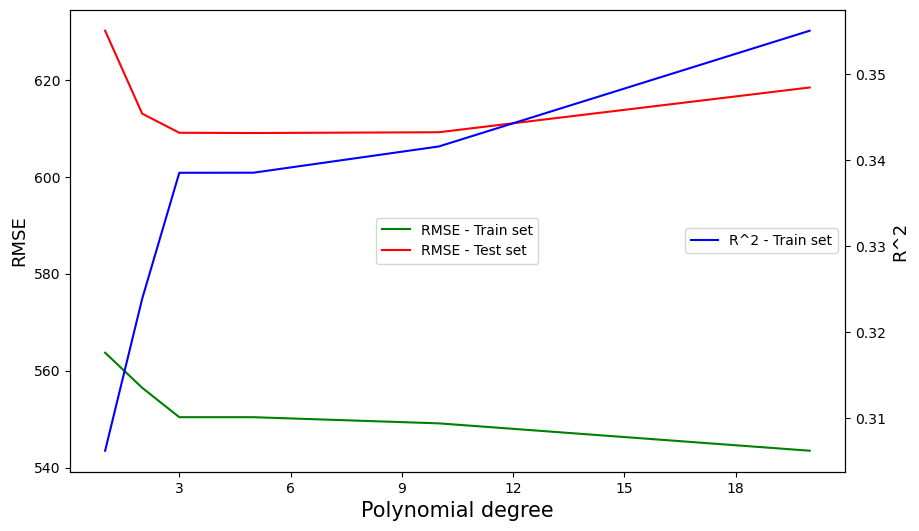

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot([1,2,3,5,10,20], rmse_train_list, color='green', label='RMSE - Train set')
ax.plot([1,2,3,5,10,20], rmse_test_list, color='red', label='RMSE - Test set')
ax.legend(loc='center')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('RMSE', size=13)
ax.set_xlabel('Polynomial degree', size=15)
ax2 = ax.twinx()
ax2.plot([1,2,3,5,10,20], r_2_train_list, color='blue', label='R^2 - Train set')
ax2.legend(loc='center right')
ax2.set_ylabel('R^2', size=13)
plt.show()

As the degree of the polynomial increases, the metrics for the training and test sets are minimized, but up to a certain point, from which the results for the test set are increasingly worse. From that point on, the model learns noise from the training set.

Lets use validation. To divide the training set into validation subsets we will use the KFold class, in which we specify how many subsets we want to divide our training set into.

In [44]:
cv = KFold(n_splits=5, shuffle=False)

In [46]:
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error', 
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hyperparams:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hyperparams: {'polynomialfeatures__degree': 3} 

RMSE: 609.0767802498342


The best results for validation sets were obtained for a polynomial of degree 3. I compared with previous model and this is right. I improved the results.

But it's not just the temperature that affects the number of bikes rented. Let's add all the numerical variables to X.

In [47]:
X = bike_data[numeric_features].copy()
y = bike_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hyperparams:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hyperparams: {'polynomialfeatures__degree': 1} 

RMSE: 618.1519697010564


Results on test set are worse. I should make features selection and dont take all new ones.

Lets try to improve the results using ElasticNet.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               ElasticNet(max_iter=10000))


params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
          'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)}

cv=5
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=cv,
                                                n_jobs=-1)

polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hyperparams:", polynomial_regression_gridsearch.best_params_, "\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Best hyperparams: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 3} 

RMSE: 476.6223796724984


I improved the results.

I still have categorical variables. For them i shouldn't create a polynomial but ONE HOT ENCODER, so i'll make a distinction in Pipeline for numeric and categorical variables.

In [49]:
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet(max_iter=10000))])


params = {
    'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
    'regressor__l1_ratio': np.arange(0.1, 1.0, 0.1)
}


final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nBest hyperparams:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')



Best hyperparams: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.9379414050112


Lets calculate metrics for this model.

In [52]:
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.5246818862090765


In [53]:
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 348.5851935515566


In [54]:
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 234195.93113132005


In [55]:
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions)}')

MAPE: 0.859331973002823


In [56]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

RMSE: 483.9379414050112


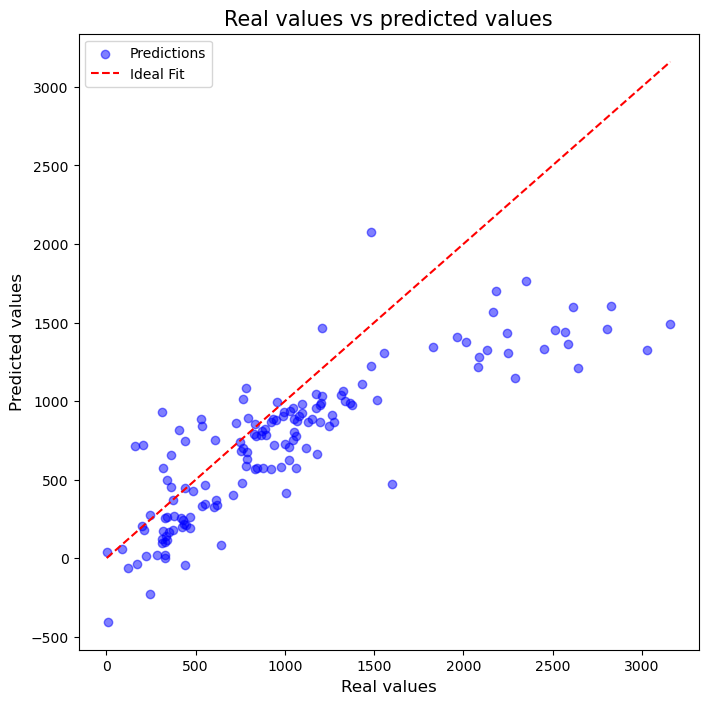

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Real values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.title('Real values vs predicted values', fontsize=15)
plt.legend(fontsize=10)
plt.show()

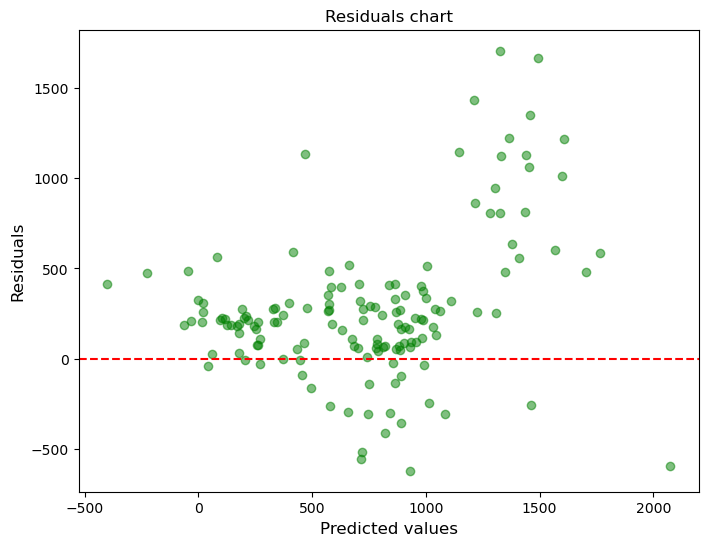

In [63]:
residuals = y_test - predictions
plt.figure(figsize=(8,6))
plt.scatter(predictions, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals chart', fontsize=12)
plt.show()

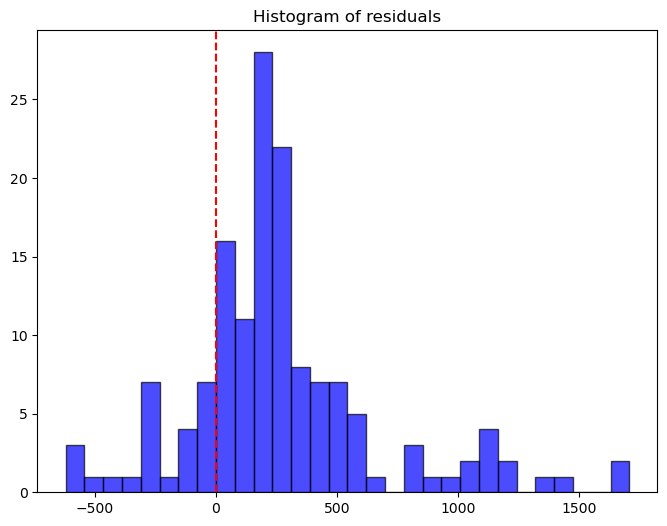

In [64]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title('Histogram of residuals', fontsize=12)
plt.show()

The first model explains only 30% of the data variability. In the last model it is better because 52%, I think it will be necessary to add new features. The average difference between predictions and actual values ​​in the first model is 391, in the last model it is 348.59 - this result is
better which suggests that the model is working stably and is not overtrained? whether such MAE is acceptable is decided by the output variable, if it has a high scale then MAE at the level of 348 is acceptable, but if the scale is small then such an error is too large and the model requires improvement. The average percentage error in the first model is 96 and 298%, in the last model it is 85% - in both cases the models predict values ​​with a large error. The model requires improvement. RMSE in the first model is 563 and 630, in the last 483 - the models do not fit the data. The models predict data with a large deviation from the actual ones. It is necessary to improve the models. Comparing the graphs of the actual values ​​and predictions in the first and last model, I think they are at a similar level, there are many outliers. The graph of residuals in the first model shows a greater clustering of the data, in my opinion there are fewer outliers than in the last model the points in both models are randomly scattered around the zero line, which may suggest that the models are well-fitted. Although in my opinion the data is more clustered around the zero line in the first model, but in both cases it can be seen that the higher the true values, the more the model underestimates. The histogram of residuals in the first model shows a lot of residuals in the negative, i.e. the model overestimates the values ​​of the explained variable, the predicted values ​​are systematically larger than the actual values. In the last model there are a lot of residuals in the positive, which suggests underestimation.